In [3]:
import pandas as pd
import geopandas as gpd
# from vbadata.geo import suburbs_coordinates_df, councils_coordinates_df
from ausdex.seifa_vic.download_data import get_data_links, load_xls_data, load_csv_data

In [2]:
from owslib.wfs import WebFeatureService
# wfs11 = WebFeatureService(url='http://openapi.aurin.org.au//wfs', version='1.0.0')
?WebFeatureService

Signature:
WebFeatureService(
    url,
    version='1.0.0',
    xml=None,
    parse_remote_metadata=False,
    timeout=30,
    username=None,
    password=None,
    headers=None,
    auth=None,
)
Docstring:
wfs factory function, returns a version specific WebFeatureService object

@type url: string
@param url: url of WFS capabilities document
@type xml: string
@param xml: elementtree object
@type parse_remote_metadata: boolean
@param parse_remote_metadata: whether to fully process MetadataURL elements
@param headers: HTTP headers to send with requests
@param timeout: time (in seconds) after which requests should timeout
@param username: service authentication username
@param password: service authentication password
@param auth: instance of owslib.util.Authentication
@return: initialized WebFeatureService object (version dependent)
File:      ~/opt/anaconda3/envs/ausdex_env/lib/python3.7/site-packages/owslib/wfs.py
Type:      function


In [2]:
links = get_data_links()

In [3]:
links

{'victoria_suburbs': 'https://data.gov.au/geoserver/vic-suburb-locality-boundaries-psma-administrative-boundaries/wfs?request=GetFeature&typeName=ckan_af33dd8c_0534_4e18_9245_fc64440f742e&outputFormat=json',
 'victoria_councils': 'https://data.gov.au/geoserver/vic-local-government-areas-psma-administrative-boundaries/wfs?request=GetFeature&typeName=ckan_bdf92691_c6fe_42b9_a0e2_a4cd716fa811&outputFormat=json',
 'seifa_suburb_2011': 'https://www.abs.gov.au/AUSSTATS/subscriber.nsf/log?openagent&2033.0.55.001%20ssc%20indexes.xls&2033.0.55.001&Data%20Cubes&F40D0630B245D5DCCA257B43000EA0F1&0&2011&05.04.2013&Latest',
 'seifa_suburb_2016': 'https://www.abs.gov.au/ausstats/subscriber.nsf/log?openagent&2033055001%20-%20ssc%20indexes.xls&2033.0.55.001&Data%20Cubes&863031D939DE8105CA25825D000F91D2&0&2016&27.03.2018&Latest',
 'victorian_suburb_list': PosixPath('/Users/garberj/repositories/ausdex/ausdex/seifa_vic/download_data.py/metadata/victorian_locations.csv')}

In [6]:
df_2011 = load_xls_data('seifa_suburb_2011', sheet_name = 'Table 1', header=[4,5])
df_2011.head()

2011 State Suburb Code (SSC)  \
            Unnamed: 0_level_1   
0                        10001   
1                        10002   
2                        10003   
3                        10004   
4                        10005   

  Index of Relative Socio-economic Advantage and Disadvantage         \
                                                        Score Decile   
0                                        1090.738502              10   
1                                        1075.478081               9   
2                                        1056.551735               8   
3                                          889.93672               2   
4                                         944.860461               3   

  Index of Relative Socio-economic Disadvantage         \
                                          Score Decile   
0                                   1075.144223      9   
1                                   1051.704265      8   
2                                   1066.142585      9   
3                                    911.503139      2   
4                                    972.237757      4   

  Index of Economic Resources        Index of Education and Occupation         \
                        Score Decile                             Score Decile   
0                  1137.10706     10                       1021.455446      7   
1                 1014.365115      5                       1126.328767     10   
2                  1086.34225      9                       1011.753343      7   
3                  934.172219      2                        852.407773      1   
4                 1007.210988      5                        853.020179      1   

  Usual Resident Population  
         Unnamed: 9_level_1  
0                    4199.0  
1                    5110.0  
2                    1005.0  
3                    2415.0  
4                    2041.0

In [15]:

df_2011.columns= [' - '.join(i) for i in df_2011.columns]
df_2011.head()


,2011 State Suburb Code (SSC) - Unnamed: 0_level_1,Index of Relative Socio-economic Advantage and Disadvantage - Score,Index of Relative Socio-economic Advantage and Disadvantage - Decile,Index of Relative Socio-economic Disadvantage - Score,Index of Relative Socio-economic Disadvantage - Decile,Index of Economic Resources - Score,Index of Economic Resources - Decile,Index of Education and Occupation - Score,Index of Education and Occupation - Decile,Usual Resident Population - Unnamed: 9_level_1
0,10001,1090.738502,10,1075.144223,9,1137.10706,10,1021.455446,7,4199.0
1,10002,1075.478081,9,1051.704265,8,1014.365115,5,1126.328767,10,5110.0
2,10003,1056.551735,8,1066.142585,9,1086.34225,9,1011.753343,7,1005.0
3,10004,889.93672,2,911.503139,2,934.172219,2,852.407773,1,2415.0
4,10005,944.860461,3,972.237757,4,1007.210988,5,853.020179,1,2041.0


In [13]:
my_tuples

['2011 State Suburb Code (SSC) - Unnamed: 0_level_1',
 'Index of Relative Socio-economic Advantage and Disadvantage - Score',
 'Index of Relative Socio-economic Advantage and Disadvantage - Decile',
 'Index of Relative Socio-economic Disadvantage - Score',
 'Index of Relative Socio-economic Disadvantage - Decile',
 'Index of Economic Resources - Score',
 'Index of Economic Resources - Decile',
 'Index of Education and Occupation - Score',
 'Index of Education and Occupation - Decile',
 'Usual Resident Population - Unnamed: 9_level_1']

In [3]:
suburbs = gpd.read_file(links['victoria_suburbs'])

In [4]:
# boundaries_2011 = gpd.read_file('/Users/garberj/data/vbadata_SEIFA/data_2011.gdb', layers = [0])
# boundaries_2011.head()
suburbs.head()

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry
0,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"MULTIPOLYGON (((141.74552 -35.07229, 141.74552..."
1,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"MULTIPOLYGON (((148.66877 -37.39571, 148.66876..."
2,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.3,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"MULTIPOLYGON (((142.92288 -37.97886, 142.90449..."
3,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.4,6673,2011-08-31,None,VIC734,2018-08-03,None,DEPTFORD,None,None,G,None,2,"MULTIPOLYGON (((147.82336 -37.66001, 147.82313..."
4,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.5,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"MULTIPOLYGON (((141.27978 -35.99859, 141.27989..."


In [5]:
suburbs_raw = gpd.read_file('/Users/garberj/repositories/vbadata/vbadata/data/geojson/suburb-10-vic.geojson')

In [6]:
suburbs_raw.head()

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry
0,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0..."
1,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66767 -37.3..."
2,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.3,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92288 -37.97886, 142.85448 -37.9..."
3,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.4,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82336 -37.66001, 147.72499 -37.6..."
4,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.5,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.27978 -35.99859, 141.28480 -35.9..."


In [22]:
vic_locations = pd.read_csv('/Users/garberj/data/vbadata_SEIFA/victorian_locations.csv')

In [23]:
vic_locations.head()

,locality_pid,gnaf_locality_pid,date_created,date_retired,locality_name,postcode,locality_class
0,VIC1,250190485.0,27/4/12,NaN,ABBEYARD,3737,GAZETTED LOCALITY
1,VIC2,250184191.0,27/4/12,NaN,ABBOTSFORD,3067,GAZETTED LOCALITY
2,VIC3,250184192.0,27/4/12,NaN,ABERFELDIE,3040,GAZETTED LOCALITY
3,VIC4,250176933.0,27/4/12,NaN,ABERFELDY,3825,GAZETTED LOCALITY
4,VIC5,250184193.0,27/4/12,NaN,ACHERON,3714,GAZETTED LOCALITY


In [24]:
duplicated_suburbs = vic_locations[vic_locations.duplicated(subset=['locality_name'])]['locality_name'].unique()

In [25]:
duplicated_suburbs

array(['ASCOT', 'BELLFIELD', 'BIG HILL', 'FAIRY DELL', 'FRAMLINGHAM',
       'GOLDEN POINT', 'HAPPY VALLEY', 'HILLSIDE', 'KILLARA', 'MERRIJIG',
       'MOONLIGHT FLAT', 'MYALL', 'NEWTOWN', 'REEDY CREEK', 'SPRINGFIELD',
       'STONY CREEK', 'THOMSON', nan], dtype=object)

In [26]:
dup_suburbs_gdf = suburbs_raw[suburbs_raw['vic_loca_2'].apply(lambda x: x in duplicated_suburbs[:-1])]

<AxesSubplot:>

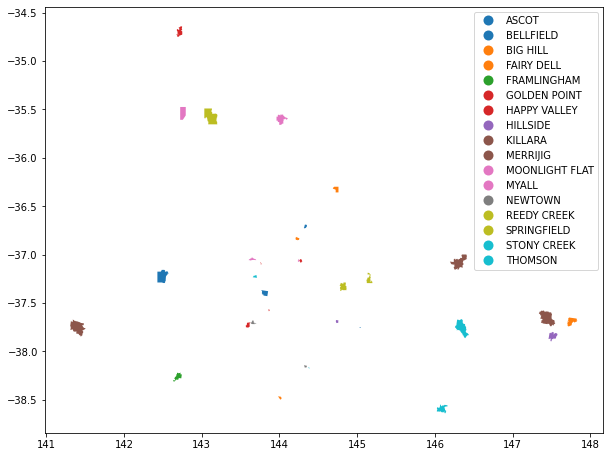

In [27]:
dup_suburbs_gdf.plot('vic_loca_2', legend = True, figsize=(10,10))

In [28]:
dup_suburbs_gdf.sort_values('vic_loca_2')

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry
2892,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2892,10060,2014-12-02,None,VIC2974,2015-02-06,None,ASCOT,None,3551,G,None,2,"POLYGON ((144.31592 -36.72816, 144.31457 -36.7..."
1246,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1199,7835,2011-08-31,None,VIC2973,2012-04-27,None,ASCOT,None,3364,G,None,2,"POLYGON ((143.76965 -37.36693, 143.80821 -37.3..."
1969,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1941,8804,2011-08-31,None,VIC2961,2012-04-27,None,BELLFIELD,None,3381,G,None,2,"POLYGON ((142.48512 -37.15735, 142.49583 -37.1..."
1897,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1861,10014,2013-11-26,None,VIC2967,2014-01-31,None,BELLFIELD,None,3081,G,None,2,"POLYGON ((145.03327 -37.74889, 145.03515 -37.7..."
709,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.654,7389,2011-08-31,None,VIC2966,2012-04-27,None,BIG HILL,None,3231,G,None,2,"POLYGON ((144.01894 -38.46716, 144.01791 -38.4..."
971,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.921,7337,2011-08-31,None,VIC2960,2012-04-27,None,BIG HILL,None,3555,G,None,2,"POLYGON ((144.25422 -36.84511, 144.24989 -36.8..."
2597,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2586,9715,2013-02-22,None,VIC2971,2012-04-27,None,FAIRY DELL,None,3561,G,None,2,"POLYGON ((144.72677 -36.29884, 144.75932 -36.2..."
1371,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1326,8210,2011-08-31,None,VIC2972,2012-04-27,None,FAIRY DELL,None,3875,G,None,2,"POLYGON ((147.70491 -37.72512, 147.70611 -37.7..."
650,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1152,7934,2011-08-31,None,VIC936,2012-04-27,None,FRAMLINGHAM,None,None,G,None,2,"POLYGON ((142.69173 -38.22064, 142.69578 -38.2..."
508,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.477,6794,2011-08-31,None,VIC2979,2012-04-27,None,GOLDEN POINT,None,3465,G,None,2,"POLYGON ((143.76022 -37.09973, 143.76056 -37.0..."


In [29]:
councils_df.head()

,geometry,Site_Municipality
0,"POLYGON ((145.09511 -37.85335, 145.19571 -37.8...",MONASH
1,"POLYGON ((144.88846 -37.71078, 144.89813 -37.7...",MOONEE VALLEY
2,"POLYGON ((144.37895 -37.43872, 144.41750 -37.4...",MOORABOOL
3,"POLYGON ((144.97214 -37.69101, 144.97056 -37.6...",MORELAND
4,"POLYGON ((145.09790 -38.16240, 145.10039 -38.1...",MORNINGTON PENINSULA


In [30]:
from geopandas.tools import sjoin
dup_suburbs_join = sjoin(dup_suburbs_gdf, councils_df.to_crs('EPSG:4326'), how="left")

In [31]:
dup_suburbs_join.sort_values('vic_loca_2')

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry,index_right,Site_Municipality
2892,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2892,10060,2014-12-02,None,VIC2974,2015-02-06,None,ASCOT,None,3551,G,None,2,"POLYGON ((144.31592 -36.72816, 144.31457 -36.7...",67,GREATER BENDIGO
1246,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1199,7835,2011-08-31,None,VIC2973,2012-04-27,None,ASCOT,None,3364,G,None,2,"POLYGON ((143.76965 -37.36693, 143.80821 -37.3...",25,BALLARAT
1969,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1941,8804,2011-08-31,None,VIC2961,2012-04-27,None,BELLFIELD,None,3381,G,None,2,"POLYGON ((142.48512 -37.15735, 142.49583 -37.1...",86,ARARAT
1969,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1941,8804,2011-08-31,None,VIC2961,2012-04-27,None,BELLFIELD,None,3381,G,None,2,"POLYGON ((142.48512 -37.15735, 142.49583 -37.1...",122,SOUTHERN GRAMPIANS
1897,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1861,10014,2013-11-26,None,VIC2967,2014-01-31,None,BELLFIELD,None,3081,G,None,2,"POLYGON ((145.03327 -37.74889, 145.03515 -37.7...",27,BANYULE
1897,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1861,10014,2013-11-26,None,VIC2967,2014-01-31,None,BELLFIELD,None,3081,G,None,2,"POLYGON ((145.03327 -37.74889, 145.03515 -37.7...",54,DAREBIN
1969,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1941,8804,2011-08-31,None,VIC2961,2012-04-27,None,BELLFIELD,None,3381,G,None,2,"POLYGON ((142.48512 -37.15735, 142.49583 -37.1...",19,NORTHERN GRAMPIANS
971,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.921,7337,2011-08-31,None,VIC2960,2012-04-27,None,BIG HILL,None,3555,G,None,2,"POLYGON ((144.25422 -36.84511, 144.24989 -36.8...",67,GREATER BENDIGO
709,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.654,7389,2011-08-31,None,VIC2966,2012-04-27,None,BIG HILL,None,3231,G,None,2,"POLYGON ((144.01894 -38.46716, 144.01791 -38.4...",126,SURF COAST
2597,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2586,9715,2013-02-22,None,VIC2971,2012-04-27,None,FAIRY DELL,None,3561,G,None,2,"POLYGON ((144.72677 -36.29884, 144.75932 -36.2...",45,CAMPASPE


In [32]:
dup_suburbs_join['suburb_name_combined'] = dup_suburbs_join.apply(lambda x: f'{x["vic_loca_2"]} - {x["Site_Municipality"]}', axis=1)

In [33]:
dup_suburbs_join.sort_values('suburb_name_combined')['suburb_name_combined'].values

array(['ASCOT - BALLARAT', 'ASCOT - GREATER BENDIGO',
       'BELLFIELD - ARARAT', 'BELLFIELD - BANYULE', 'BELLFIELD - DAREBIN',
       'BELLFIELD - NORTHERN GRAMPIANS', 'BELLFIELD - SOUTHERN GRAMPIANS',
       'BIG HILL - GREATER BENDIGO', 'BIG HILL - SURF COAST',
       'FAIRY DELL - CAMPASPE', 'FAIRY DELL - EAST GIPPSLAND',
       'FRAMLINGHAM - MOYNE', 'GOLDEN POINT - BALLARAT',
       'GOLDEN POINT - CENTRAL GOLDFIELDS',
       'GOLDEN POINT - MOUNT ALEXANDER', 'HAPPY VALLEY - BALRANALD',
       'HAPPY VALLEY - GOLDEN PLAINS', 'HAPPY VALLEY - SWAN HILL',
       'HILLSIDE - BRIMBANK', 'HILLSIDE - EAST GIPPSLAND',
       'HILLSIDE - MELTON', 'KILLARA - GLENELG', 'KILLARA - WODONGA',
       'MERRIJIG - EAST GIPPSLAND', 'MERRIJIG - MANSFIELD',
       'MOONLIGHT FLAT - CENTRAL GOLDFIELDS',
       'MOONLIGHT FLAT - MOUNT ALEXANDER', 'MYALL - BULOKE',
       'MYALL - GANNAWARRA', 'MYALL - WAKOOL', 'MYALL - YARRIAMBIACK',
       'NEWTOWN - GOLDEN PLAINS', 'NEWTOWN - GREATER GEELONG',
    

In [34]:
def group_repeat_names(x):
    if x['loc_pid'] == 'VIC2961':
        return 'BELLFIELD - GRAMPIANS'
    elif x['loc_pid'] == 'VIC2967':
        return 'BELLFIELD - BANYULE'
    elif x['loc_pid'] == 'VIC2976':
        return 'HAPPY VALLEY - SWAN HILL'
    elif x['loc_pid'] == 'VIC2984':
        return 'HILLSIDE - MELTON'
    elif x['loc_pid'] == 'VIC2990':
        return 'REEDY CREEK - MITCHELL'
    elif x['loc_pid'] == 'VIC2969':
        return 'SPRINGFIELD - MACEDON RANGES'
    elif x['loc_pid'] == 'VIC2963':
        return 'STONY CREEK - HEPBURN'
    else:
        return x['suburb_name_combined']
    
    

In [35]:
dup_suburbs_join['fixed_multinames'] = dup_suburbs_join.apply(group_repeat_names, axis=1)

In [36]:
dup_suburbs_join_dis = dup_suburbs_join.drop_duplicates(subset=['fixed_multinames'])

In [37]:
dup_suburbs_join_dis

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry,index_right,Site_Municipality,suburb_name_combined,fixed_multinames
74,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.75,6591,2011-08-31,None,VIC2990,2013-01-23,None,REEDY CREEK,None,None,G,None,2,"POLYGON ((145.13173 -37.23942, 145.13216 -37.2...",12,MURRINDINDI,REEDY CREEK - MURRINDINDI,REEDY CREEK - MITCHELL
349,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.434,6788,2011-08-31,None,VIC2985,2012-04-27,None,THOMSON,None,3219,G,None,2,"POLYGON ((144.38409 -38.17092, 144.38234 -38.1...",69,GREATER GEELONG,THOMSON - GREATER GEELONG,THOMSON - GREATER GEELONG
382,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.367,6748,2011-08-31,None,VIC2965,2012-04-27,None,KILLARA,None,3691,G,None,2,"POLYGON ((146.95410 -36.13335, 146.95361 -36.1...",108,WODONGA,KILLARA - WODONGA,KILLARA - WODONGA
490,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.473,6771,2011-08-31,None,VIC2959,2012-04-27,None,KILLARA,None,3312,G,None,2,"POLYGON ((141.44650 -37.84609, 141.44601 -37.8...",64,GLENELG,KILLARA - GLENELG,KILLARA - GLENELG
500,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.470,6951,2011-08-31,None,VIC2987,2012-04-27,None,MOONLIGHT FLAT,None,3450,G,None,2,"POLYGON ((144.24817 -37.04472, 144.24892 -37.0...",5,MOUNT ALEXANDER,MOONLIGHT FLAT - MOUNT ALEXANDER,MOONLIGHT FLAT - MOUNT ALEXANDER
508,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.477,6794,2011-08-31,None,VIC2979,2012-04-27,None,GOLDEN POINT,None,3465,G,None,2,"POLYGON ((143.76022 -37.09973, 143.76056 -37.0...",48,CENTRAL GOLDFIELDS,GOLDEN POINT - CENTRAL GOLDFIELDS,GOLDEN POINT - CENTRAL GOLDFIELDS
532,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.498,6867,2011-08-31,None,VIC2977,2012-04-27,None,GOLDEN POINT,None,3350,G,None,2,"POLYGON ((143.85456 -37.57172, 143.85897 -37.5...",25,BALLARAT,GOLDEN POINT - BALLARAT,GOLDEN POINT - BALLARAT
650,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1152,7934,2011-08-31,None,VIC936,2012-04-27,None,FRAMLINGHAM,None,None,G,None,2,"POLYGON ((142.69173 -38.22064, 142.69578 -38.2...",10,MOYNE,FRAMLINGHAM - MOYNE,FRAMLINGHAM - MOYNE
709,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.654,7389,2011-08-31,None,VIC2966,2012-04-27,None,BIG HILL,None,3231,G,None,2,"POLYGON ((144.01894 -38.46716, 144.01791 -38.4...",126,SURF COAST,BIG HILL - SURF COAST,BIG HILL - SURF COAST
837,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.806,7300,2011-08-31,None,VIC2978,2012-04-27,None,GOLDEN POINT,None,3451,G,None,2,"POLYGON ((144.25641 -37.05765, 144.26048 -37.0...",5,MOUNT ALEXANDER,GOLDEN POINT - MOUNT ALEXANDER,GOLDEN POINT - MOUNT ALEXANDER


In [38]:
double_name_converter = {code:name for code, name in zip(dup_suburbs_join_dis.loc_pid.values, dup_suburbs_join_dis.fixed_multinames.values)}

In [39]:
double_name_converter

{'VIC2990': 'REEDY CREEK - MITCHELL',
 'VIC2985': 'THOMSON - GREATER GEELONG',
 'VIC2965': 'KILLARA - WODONGA',
 'VIC2959': 'KILLARA - GLENELG',
 'VIC2987': 'MOONLIGHT FLAT - MOUNT ALEXANDER',
 'VIC2979': 'GOLDEN POINT - CENTRAL GOLDFIELDS',
 'VIC2977': 'GOLDEN POINT - BALLARAT',
 'VIC936': 'FRAMLINGHAM - MOYNE',
 'VIC2966': 'BIG HILL - SURF COAST',
 'VIC2978': 'GOLDEN POINT - MOUNT ALEXANDER',
 'VIC2988': 'MOONLIGHT FLAT - CENTRAL GOLDFIELDS',
 'VIC2960': 'BIG HILL - GREATER BENDIGO',
 'VIC2975': 'HAPPY VALLEY - GOLDEN PLAINS',
 'VIC2973': 'ASCOT - BALLARAT',
 'VIC2972': 'FAIRY DELL - EAST GIPPSLAND',
 'VIC2982': 'MYALL - BULOKE',
 'VIC2970': 'SPRINGFIELD - SWAN HILL',
 'VIC2986': 'THOMSON - BAW BAW',
 'VIC2964': 'MERRIJIG - MANSFIELD',
 'VIC2962': 'NEWTOWN - GREATER GEELONG',
 'VIC2969': 'SPRINGFIELD - MACEDON RANGES',
 'VIC2967': 'BELLFIELD - BANYULE',
 'VIC2983': 'HILLSIDE - EAST GIPPSLAND',
 'VIC2961': 'BELLFIELD - GRAMPIANS',
 'VIC2963': 'STONY CREEK - HEPBURN',
 'VIC2981': 'MYAL

In [40]:
def change_multinames(x, cdict = double_name_converter):
    if x['loc_pid'] in cdict:
        return cdict[x['loc_pid'] ]
    else:
        return x['vic_loca_2']

In [41]:
suburbs_raw['fixed_names'] = suburbs_raw.apply(change_multinames, axis=1)

In [42]:
suburbs_raw[suburbs_raw['loc_pid']=="VIC2974"].head()

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry,fixed_names
2892,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2892,10060,2014-12-02,None,VIC2974,2015-02-06,None,ASCOT,None,3551,G,None,2,"POLYGON ((144.31592 -36.72816, 144.31457 -36.7...",ASCOT - GREATER BENDIGO


In [43]:
suburbs_raw.to_file('/Users/garberj/repositories/vbadata/vbadata/data/geojson/qgis.geojson')

<ipython-input-43-6443f529b37b>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  suburbs_raw.to_file('/Users/garberj/repositories/vbadata/vbadata/data/geojson/suburbs_multiname.geojson')


In [44]:
suburbs_raw = gpd.read_file('/Users/garberj/repositories/vbadata/vbadata/data/geojson/suburbs_multiname.geojson')

In [45]:
suburbs_raw.head()

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,fixed_name,geometry
0,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,UNDERBOOL,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0..."
1,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,NURRAN,"POLYGON ((148.66877 -37.39571, 148.66767 -37.3..."
2,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.3,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,WOORNDOO,"POLYGON ((142.92288 -37.97886, 142.85448 -37.9..."
3,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.4,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,DEPTFORD,"POLYGON ((147.82336 -37.66001, 147.72499 -37.6..."
4,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.5,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,YANAC,"POLYGON ((141.27978 -35.99859, 141.28480 -35.9..."


Geospatial representatin of 2011 and 2006 data

In [46]:
for fal in vic_locations[vic_locations.duplicated(subset=['postcode'])].locality_name.values:
    print(fal)

AIRE VALLEY
ALBACUTYA
ALBERTON WEST
ALEXANDRA
ALLAMBEE SOUTH
ALMA
AMOR
APPIN SOUTH
ARBUCKLE
ARCADIA SOUTH
ARCHDALE JUNCTION
ARCHIES CREEK
ARMSTRONG
ARNOLD WEST
ASCOT
ASCOT
ASHWOOD
ASPENDALE GARDENS
AXE CREEK
AXEDALE
BAEL BAEL
BAGSHOT
BAGSHOT NORTH
BAKERY HILL
BALD HILLS
BALINTORE
BALLARAT CENTRAL
BALLARAT EAST
BALLARAT NORTH
BALLIANG
BALLIANG EAST
BALNARRING BEACH
BALOOK
BAMAWM
BANDIANA
BANGERANG
BANKSIA PENINSULA
BANNERTON
BARANDUDA
BARINGHUP WEST
BARJARG
BARKSTEAD
BARNAWARTHA NORTH
BAROMI
BARONGAROOK
BARONGAROOK WEST
BARRAMUNGA
BARRAPORT WEST
BARUNAH PLAINS
BARWIDGEE
BATESFORD
BAW BAW
BAYINDEEN
BAYNTON
BAYNTON EAST
BAYSWATER NORTH
BEALIBA
BEAUCHAMP
BEAZLEYS BRIDGE
BELGRAVE HEIGHTS
BELGRAVE SOUTH
BELL POST HILL
BELLBRIDGE
BELLFIELD
BELLS BEACH
BEMM RIVER
BENAYEO
BENGWORDEN
BENJEROOP
BEREMBOKE
BERRINGAMA
BETE BOLONG
BETE BOLONG NORTH
BETHANGA
BETLEY
BIG HILL
BIG HILL
BIG HILL
BILLABONG
BINGO MUNJIE
BIRCHIP
BIRCHIP WEST
BLACK HILL
BLACK RANGE
BLACK ROCK
BLACKBURN NORTH
BLACKBURN SOUTH
B

SANDY POINT
SARGOOD
SARSFIELD
SAWMILL SETTLEMENT
SCARSDALE
SCOTCHMANS LEAD
SCOTSBURN
SEA LAKE
SEABROOK
SEACOMBE
SEAHOLME
SEASPRAY
SEATON
SEAVIEW
SEBASTIAN
SEBASTOPOL
SEDDON
SEDGWICK
SELBY
SELWYN
SEPARATION CREEK
SERPENTINE
SERVICETON
SEVILLE
SEVILLE EAST
SEYMOUR
SHADY CREEK
SHANNONVALE
SHAYS FLAT
SHE OAKS
SHEANS CREEK
SHEEP HILLS
SHELBOURNE
SHELFORD
SHELLEY
SHEPHERDS FLAT
SHEPPARTON
SHEPPARTON EAST
SHEPPARTON NORTH
SHOREHAM
SIDONIA
SILVERLEAVES
SIMPSON
SIMPSONS CREEK
SIMSON
SKENES CREEK
SKENES CREEK NORTH
SKIBO
SKINNERS FLAT
SKIPTON
SKYE
SLATY CREEK
SMEATON
SMITHS BEACH
SMOKEY TOWN
SMOKEYTOWN
SMOKO
SMYTHES CREEK
SMYTHESDALE
SNAKE ISLAND
SNAKE VALLEY
SOLDIERS HILL
SOMERVILLE
SOUTH DUDLEY
SOUTH GEELONG
SOUTH KINGSVILLE
SOUTH PURRUMBETE
SOUTHBANK
SOUTHERN CROSS
SPARGO CREEK
SPEEWA
SPOTSWOOD
SPRING GULLY
SPRING HILL
SPRINGBANK
SPRINGDALLAH
SPRINGFIELD
SPRINGFIELD
SPRINGFIELD
SPRINGHURST
SPRINGMOUNT
SPRINGVALE SOUTH
ST ALBANS
ST ALBANS PARK
ST ANDREWS BEACH
ST ARNAUD
ST ARNAUD EAST
ST ARNAU

In [47]:
ssc_2011 = pd.read_csv('/Users/garberj/data/vbadata_SEIFA/SSC_2011_AUST.csv')

In [48]:
ssc_2011 = ssc_2011[(ssc_2011['SSC_CODE_2011'] > 20000) &( ssc_2011['SSC_CODE_2011'] <30000)]

In [49]:
ssc_2011.head()

,SA1_MAINCODE_2011,SSC_CODE_2011,SSC_NAME_2011,CONF_VALUE,AREA_ALBERS_SQKM
8,21701142216,29191,Unclassified (Vic.),NaN,0.000000
9,21203130807,29191,Unclassified (Vic.),NaN,0.000000
10,20503109311,29191,Unclassified (Vic.),NaN,0.000000
17928,20607113904,20001,Abbotsford (Vic.),Very good,0.369466
17929,20607113901,20001,Abbotsford (Vic.),Very good,0.074908


In [50]:
ssc_2011.tail()

,SA1_MAINCODE_2011,SSC_CODE_2011,SSC_NAME_2011,CONF_VALUE,AREA_ALBERS_SQKM
31259,21005124453,21544,Yuroke,Poor,20.511348
31260,29999949999,29494,No usual address (Vic.),NaN,0.000000
31261,29797979992,29797,Migratory - Offshore - Shipping (Vic.),NaN,0.000000
31262,29797979991,29797,Migratory - Offshore - Shipping (Vic.),NaN,0.000000
31263,29797979993,29797,Migratory - Offshore - Shipping (Vic.),NaN,0.000000


In [51]:
ssc_2011.drop_duplicates(subset=
                         ['SSC_CODE_2011'], keep='first', inplace=True,)

In [52]:
ssc_2011.shape

(1547, 5)

In [53]:
ssc_2011.shape

(1547, 5)

In [54]:
for name in ssc_2011['SSC_NAME_2011']:
    if ' Vic.)' in name:
        print(name)

Ascot (Ballarat - Vic.)
Ascot (Greater Bendigo - Vic.)
Bellfield (Banyule - Vic.)
Big Hill (Greater Bendigo - Vic.)
Golden Point (Ballarat - Vic.)
Hillside (Melton - Vic.)
Merrijig (Mansfield - Vic.)
Newtown (Greater Geelong - Vic.)
Stony Creek (South Gippsland - Vic.)
Thomson (Greater Geelong - Vic.)


In [55]:
ssc_2011 = pd.read_csv('/Users/garberj/data/vbadata_SEIFA/SSC_2011_AUST.csv')

In [56]:
ssc_2011 = ssc_2011[(ssc_2011['SSC_CODE_2011'] > 20000) &( ssc_2011['SSC_CODE_2011'] <30000)]

In [57]:
ssc_2011.head()

,SA1_MAINCODE_2011,SSC_CODE_2011,SSC_NAME_2011,CONF_VALUE,AREA_ALBERS_SQKM
8,21701142216,29191,Unclassified (Vic.),NaN,0.000000
9,21203130807,29191,Unclassified (Vic.),NaN,0.000000
10,20503109311,29191,Unclassified (Vic.),NaN,0.000000
17928,20607113904,20001,Abbotsford (Vic.),Very good,0.369466
17929,20607113901,20001,Abbotsford (Vic.),Very good,0.074908


In [58]:
ssc_2011.tail()

,SA1_MAINCODE_2011,SSC_CODE_2011,SSC_NAME_2011,CONF_VALUE,AREA_ALBERS_SQKM
31259,21005124453,21544,Yuroke,Poor,20.511348
31260,29999949999,29494,No usual address (Vic.),NaN,0.000000
31261,29797979992,29797,Migratory - Offshore - Shipping (Vic.),NaN,0.000000
31262,29797979991,29797,Migratory - Offshore - Shipping (Vic.),NaN,0.000000
31263,29797979993,29797,Migratory - Offshore - Shipping (Vic.),NaN,0.000000


In [59]:
ssc_2011.drop_duplicates(subset=
                         ['SSC_CODE_2011'], keep='first', inplace=True,)

In [60]:
ssc_2011.shape

(1547, 5)

In [61]:
ssc_2011 = ssc_2011[(ssc_2011.SSC_CODE_2011 > 19999) & (ssc_2011.SSC_CODE_2011 < 30000)]

In [62]:
ssc_2011.shape

(1547, 5)

In [63]:
ssc_2011 = ssc_2011.drop_duplicates(subset='SSC_CODE_2011')

In [64]:
ssc_2011.shape

(1547, 5)

In [65]:
ssc_2006 = pd.read_excel('/Users/garberj/data/vbadata_SEIFA/ssc_2006.xlsx')


In [66]:
ssc_2006.shape

(1498, 2)

In [67]:
ssc_2011.shape

(1547, 5)

In [68]:
for name in ssc_2011['SSC_NAME_2011']:
    if ' Vic.)' in name:
        print(name)

Ascot (Ballarat - Vic.)
Ascot (Greater Bendigo - Vic.)
Bellfield (Banyule - Vic.)
Big Hill (Greater Bendigo - Vic.)
Golden Point (Ballarat - Vic.)
Hillside (Melton - Vic.)
Merrijig (Mansfield - Vic.)
Newtown (Greater Geelong - Vic.)
Stony Creek (South Gippsland - Vic.)
Thomson (Greater Geelong - Vic.)


<AxesSubplot:>

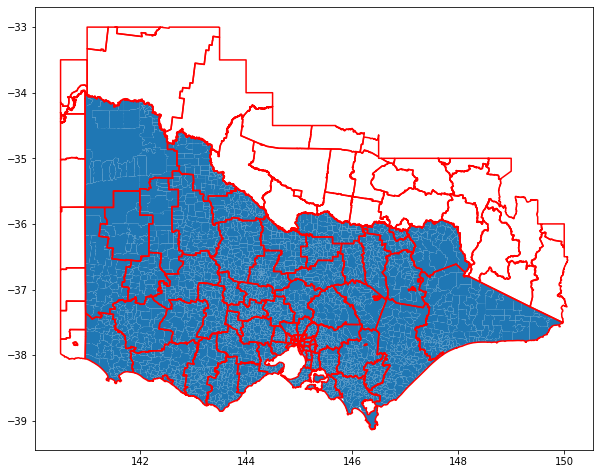

In [69]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
suburbs_raw.plot(ax=ax)
councils_df.boundary.plot(ax=ax, color='red')

In [70]:
df_2016 = pd.read_excel('/Users/garberj/data/vbadata_SEIFA/2016_SEIFA_SUBURB.xlsx')


df_2011 = pd.read_excel('/Users/garberj/data/vbadata_SEIFA/2011_SEIFA_SUBURB.xlsx')



In [71]:
df_2011 = df_2011[(df_2011['2011 State Suburb Code (SSC)'] > 19999) & (df_2011['2011 State Suburb Code (SSC)'] < 30000)]

In [72]:
df_2011

,2011 State Suburb Code (SSC),Index of Relative Socio-economic Advantage and Disadvantage - Score,Index of Relative Socio-economic Advantage and Disadvantage - Decile,Index of Relative Socio-economic Disadvantage - Score,Index of Relative Socio-economic Disadvantage - Decile,Index of Economic Resources - Score,Index of Economic Resources - Decile,Index of Education and Occupation - Score,Index of Education and Occupation - Decile,Usual Resident Population
2566,20001,1070.916533,9,1054.014288,8,981.068846,4,1149.792586,10,4913
2567,20002,1086.144697,9,1087.153515,10,1051.581972,7,1088.222658,9,3611
2568,20003,1043.039356,8,1041.931854,7,1047.523451,7,1106.273672,10,268
2569,20004,1032.040587,7,1037.944389,7,1013.358333,5,1091.384818,9,712
2570,20005,992.489706,5,1005.800016,5,993.402342,4,979.682685,5,6958
...,...,...,...,...,...,...,...,...,...,...
4077,21540,1012.522524,6,1028.474605,7,1051.45543,7,964.774554,5,269
4078,21541,979.038899,5,1002.072669,5,991.414351,4,952.746542,4,814
4079,21542,1034.965555,7,1048.52806,8,1071.13944,8,975.027361,5,667
4080,21543,1053.452892,8,1053.261117,8,1075.576472,9,1067.628759,9,356


In [73]:
print(df_2016.columns)

Index(['2016 State Suburb (SSC) Code', '2016 State Suburb (SSC) Name',
       'Index of Relative Socio-economic Disadvantage - Score',
       'Index of Relative Socio-economic Disadvantage - Decile',
       'Index of Relative Socio-economic Advantage and Disadvantage - Score',
       'Index of Relative Socio-economic Advantage and Disadvantage - Decile',
       'Index of Economic Resources - Score',
       'Index of Economic Resources - Decile',
       'Index of Education and Occupation - Score',
       'Index of Education and Occupation - Decile',
       'Usual Resident Population',
       'Data should be used with caution - area not well represented by SA1s'],
      dtype='object')


In [74]:
def convert_spreadsheet_colnames(df):
    name_change = {}
    drop_cols = []
    for col in df.columns:
        if ('Suburb (SSC) Code' in col) or ('state suburb code (ssc)' in col.lower()):
            name_change[col] = 'suburb_code'
        elif 'Suburb (SSC) Name' in col:
            name_change[col] = 'suburb_name'
        elif 'Economic Resources - Score' in col:
            name_change[col] = 'ier_score'
        elif 'Education and Occupation - Score' in col:
            name_change[col] = 'ieo_score'
        elif 'Resident Population' in col:
            name_change[col] = 'population'
        else:
            drop_cols.append(col)
    print(drop_cols, name_change)
    return df.rename(columns = name_change).drop(columns=drop_cols)

        
            

In [75]:

def suburb_name_fix(x):
    if type(x) == str:
        if '(' in x:
            x = x.split('(')[0]
        return x.upper().strip()
    else:
        return x

In [76]:
df_vic_sub = df_2016[(df_2016['2016 State Suburb (SSC) Code'] < 30000) & (df_2016['2016 State Suburb (SSC) Code'] > 19999)]

In [77]:
suburb_dict = df_vic_sub[['2016 State Suburb (SSC) Code',"2016 State Suburb (SSC) Name" ]].to_dict('records')

In [78]:
df_out_l = []

for year, df in zip([2016, 2011], [ df_2016, df_2011]):
    df_rename = convert_spreadsheet_colnames(df)
    df_rename = df_rename[(df_rename['suburb_code'] < 30000) & (df_rename['suburb_code'] > 19999)]
    if year == 2006:
     
        df_rename = df_rename.merge(ssc_2006, left_on='suburb_code', right_on='SSC Code', how='left')
        df_rename.rename(columns={"SSC Name":'suburb_name'}, inplace=True)
    if year == 2011:
        
        df_rename = df_rename.merge(ssc_2011[['SSC_CODE_2011','SSC_NAME_2011']], left_on='suburb_code', right_on='SSC_CODE_2011', how='left')
        df_rename.rename(columns={"SSC_NAME_2011":'suburb_name'}, inplace=True)
        
    df_rename['year'] = year
    df_out_l.append(df_rename)
    
        
    
    

['Index of Relative Socio-economic Disadvantage - Score', 'Index of Relative Socio-economic Disadvantage - Decile', 'Index of Relative Socio-economic Advantage and Disadvantage - Score', 'Index of Relative Socio-economic Advantage and Disadvantage - Decile', 'Index of Economic Resources - Decile', 'Index of Education and Occupation - Decile', 'Data should be used with caution - area not well represented by SA1s'] {'2016 State Suburb (SSC) Code': 'suburb_code', '2016 State Suburb (SSC) Name': 'suburb_name', 'Index of Economic Resources - Score': 'ier_score', 'Index of Education and Occupation - Score': 'ieo_score', 'Usual Resident Population': 'population'}
['Index of Relative Socio-economic Advantage and Disadvantage - Score', 'Index of Relative Socio-economic Advantage and Disadvantage - Decile', 'Index of Relative Socio-economic Disadvantage - Score', 'Index of Relative Socio-economic Disadvantage - Decile', 'Index of Economic Resources - Decile', 'Index of Education and Occupation -

In [79]:
df_comb = pd.concat(df_out_l)

In [80]:
for name in df_comb.suburb_name.values:
    if ' Vic.)' in name:
        print(name)

Ascot (Ballarat - Vic.)
Ascot (Greater Bendigo - Vic.)
Bellfield (Banyule - Vic.)
Big Hill (Greater Bendigo - Vic.)
Big Hill (Surf Coast - Vic.)
Fairy Dell (Campaspe - Vic.)
Golden Point (Ballarat - Vic.)
Golden Point (Mount Alexander - Vic.)
Happy Valley (Golden Plains - Vic.)
Happy Valley (Swan Hill - Vic.)
Hillside (East Gippsland - Vic.)
Hillside (Melton - Vic.)
Killara (Wodonga - Vic.)
Merrijig (Mansfield - Vic.)
Moonlight Flat (Central Goldfields - Vic.)
Moonlight Flat (Mount Alexander - Vic.)
Myall (Gannawarra - Vic.)
Newtown (Golden Plains - Vic.)
Newtown (Greater Geelong - Vic.)
Springfield (Macedon Ranges - Vic.)
Stony Creek (South Gippsland - Vic.)
Thomson (Greater Geelong - Vic.)
Ascot (Ballarat - Vic.)
Ascot (Greater Bendigo - Vic.)
Bellfield (Banyule - Vic.)
Big Hill (Greater Bendigo - Vic.)
Golden Point (Ballarat - Vic.)
Hillside (Melton - Vic.)
Merrijig (Mansfield - Vic.)
Newtown (Greater Geelong - Vic.)
Stony Creek (South Gippsland - Vic.)
Thomson (Greater Geelong - Vi

In [81]:
name_fixer_dict_2016 = {
    #2016
    'Ascot (Ballarat - Vic.)': 'ASCOT - BALLARAT',
    'Ascot (Greater Bendigo - Vic.)': 'ASCOT - GREATER BENDIGO',
    'Bellfield (Banyule - Vic.)': 'BELLFIELD - BANYULE',
    'Big Hill (Greater Bendigo - Vic.)': 'BIG HILL - GREATER BENDIGO',
    'Big Hill (Surf Coast - Vic.)': 'BIG HILL - SURF COAST',
    'Fairy Dell (Campaspe - Vic.)': 'FAIRY DELL - CAMPASPE',
    'Golden Point (Ballarat - Vic.)': 'GOLDEN POINT - BALLARAT',
    'Golden Point (Mount Alexander - Vic.)': 'GOLDEN POINT - MOUNT ALEXANDER', 
    'Happy Valley (Golden Plains - Vic.)': 'HAPPY VALLEY - GOLDEN PLAINS',
    'Happy Valley (Swan Hill - Vic.)': 'HAPPY VALLEY - SWAN HILL',
    'Hillside (East Gippsland - Vic.)': 'HILLSIDE - EAST GIPPSLAND',
    'Hillside (Melton - Vic.)': 'HILLSIDE - MELTON',
    'Killara (Wodonga - Vic.)': 'KILLARA - WODONGA',
    'Merrijig (Mansfield - Vic.)': 'MERRIJIG - MANSFIELD',
    'Moonlight Flat (Central Goldfields - Vic.)': 'MOONLIGHT FLAT - CENTRAL GOLDFIELDS',
    'Moonlight Flat (Mount Alexander - Vic.)':'MOONLIGHT FLAT - MOUNT ALEXANDER',
    'Myall (Gannawarra - Vic.)':'MYALL - GANNAWARRA',
    'Newtown (Golden Plains - Vic.)':'NEWTOWN - GOLDEN PLAINS',
    'Newtown (Greater Geelong - Vic.)':'NEWTOWN - GREATER GEELONG',
    'Springfield (Macedon Ranges - Vic.)':'SPRINGFIELD - MACEDON RANGES',
    'Stony Creek (South Gippsland - Vic.)':'STONY CREEK - SOUTH GIPPSLAND',
    'Thomson (Greater Geelong - Vic.)':'THOMSON - GREATER GEELONG'
#     #2011
#     'Ascot (Ballarat - Vic.)': 'ASCOT - BALLARAT',
#     'Ascot (Greater Bendigo - Vic.)': 'ASCOT - GREATER BENDIGO',
#     'Bellfield (Banyule - Vic.)': 'BELLFIELD - BANYULE',
#     'Big Hill (Greater Bendigo - Vic.)':'BIG HILL - GREATER BENDIGO' ,
#     'Golden Point (Ballarat - Vic.)': 'GOLDEN POINT - BALLARAT',
#     'Hillside (Melton - Vic.)': 'HILLSIDE - MELTON',
#     'Merrijig (Mansfield - Vic.)': 'MERRIJIG - MANSFIELD',
#     'Newtown (Greater Geelong - Vic.)': 'NEWTOWN - GREATER GEELONG',
#     'Stony Creek (South Gippsland - Vic.)': 'STONY CREEK - SOUTH GIPPSLAND',
#     'Thomson (Greater Geelong - Vic.)': 'THOMSON - GREATER GEELONG',
}

In [82]:
def fix_2016_multisuburbs(x, cdict = name_fixer_dict_2016):
    if x['suburb_name'] in cdict:
        return cdict[x['suburb_name']]
    else:
        return x['suburb_name']

In [83]:
df_comb['suburb_name_fix'] = df_comb.apply(fix_2016_multisuburbs, axis=1)

In [84]:
'ASCOT - BALLARAT' in df_comb.suburb_name_fix.values

True

In [85]:
df_comb['Site_suburb'] = df_comb.suburb_name_fix.apply(suburb_name_fix)

In [86]:
df_comb[df_comb['Site_suburb']=='ASCOT - BALLARAT']

,suburb_code,suburb_name,ier_score,ieo_score,population,year,SSC_CODE_2011,suburb_name_fix,Site_suburb
4176,20072,Ascot (Ballarat - Vic.),1051,1022,96,2016,NaN,ASCOT - BALLARAT,ASCOT - BALLARAT
30,20031,Ascot (Ballarat - Vic.),1081.625957,1036.951886,353,2011,20031.0,ASCOT - BALLARAT,ASCOT - BALLARAT


In [37]:
df_2011.head()

,2011 State Suburb Code (SSC),Index of Relative Socio-economic Advantage and Disadvantage - Score,Index of Relative Socio-economic Advantage and Disadvantage - Decile,Index of Relative Socio-economic Disadvantage - Score,Index of Relative Socio-economic Disadvantage - Decile,Index of Economic Resources - Score,Index of Economic Resources - Decile,Index of Education and Occupation - Score,Index of Education and Occupation - Decile,Usual Resident Population
0,10001,1090.738502,10,1075.144223,9,1137.10706,10,1021.455446,7,4199
1,10002,1075.478081,9,1051.704265,8,1014.365115,5,1126.328767,10,5110
2,10003,1056.551735,8,1066.142585,9,1086.34225,9,1011.753343,7,1005
3,10004,889.93672,2,911.503139,2,934.172219,2,852.407773,1,2415
4,10005,944.860461,3,972.237757,4,1007.210988,5,853.020179,1,2041


In [67]:
df_comb

,suburb_code,suburb_name,ier_score,ieo_score,population,year,suburb_name_fix,Site_suburb
4113,20002,Abbotsford (Vic.),952,1159,8184,2016,Abbotsford (Vic.),ABBOTSFORD
4114,20003,Aberfeldie,1079,1102,3897,2016,Aberfeldie,ABERFELDIE
4115,20005,Acheron,1035,1061,171,2016,Acheron,ACHERON
4116,20007,Adams Estate,991,896,59,2016,Adams Estate,ADAMS ESTATE
4117,20008,Addington,1031,1009,71,2016,Addington,ADDINGTON
...,...,...,...,...,...,...,...,...
6782,22924,Yulecart,1049,1058,127,2016,Yulecart,YULECART
6783,22925,Yundool,1070,1004,44,2016,Yundool,YUNDOOL
6784,22926,Yuroke,1070,1015,142,2016,Yuroke,YUROKE
6785,22927,Yuulong,994,998,37,2016,Yuulong,YUULONG


# Assemble 2006 geodataframes

In [70]:
CD_2006 = gpd.read_file('/Users/garberj/data/vbadata_SEIFA/1259030002_cd06avic_shape/CD06aVIC.shp')

<AxesSubplot:>

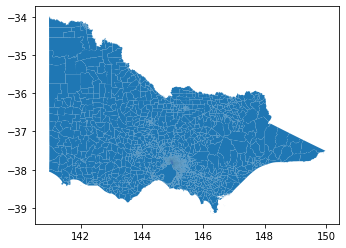

In [71]:
CD_2006.plot()

In [72]:
CD_2006.head()

,STATE_CODE,CD_CODE06,SLA_CODE06,SLA_NAME06,LGA_CODE06,LGA_NAME06,geometry
0,2,2291001,205054601,Melbourne (C) - Inner,24600,Melbourne (C),"POLYGON ((144.95392 -37.81247, 144.95416 -37.8..."
1,2,2291002,205054601,Melbourne (C) - Inner,24600,Melbourne (C),"POLYGON ((144.96226 -37.81228, 144.96331 -37.8..."
2,2,2291003,205054601,Melbourne (C) - Inner,24600,Melbourne (C),"POLYGON ((144.96874 -37.80816, 144.96920 -37.8..."
3,2,2291004,205054601,Melbourne (C) - Inner,24600,Melbourne (C),"POLYGON ((144.96563 -37.81353, 144.96575 -37.8..."
4,2,2291005,205054601,Melbourne (C) - Inner,24600,Melbourne (C),"POLYGON ((144.97305 -37.81136, 144.97350 -37.8..."


In [73]:
CD_2006['CD_CODE06'] = pd.to_numeric(CD_2006['CD_CODE06']).astype('int')

In [74]:
seifa_2006 = pd.read_excel('/Users/garberj/data/vbadata_SEIFA/seifa_2006_CD.xlsx')

In [75]:
seifa_2006.columns = ['cd_code', 'irsad_score', 'irsd_score', 'ier_score', 'ieo_score', 'population']

In [76]:
seifa_2006.head()

,cd_code,irsad_score,irsd_score,ier_score,ieo_score,population
0,1010101,902.17,919.32,916.47,928.63,826
1,1010102,877.68,899.45,950.75,886.63,389
2,1010103,1058.64,1084.07,1130.07,1088.35,84
3,1010104,970.24,1017.43,1023.48,1004.00,114
4,1010105,1078.73,1080.70,1168.25,1105.24,46


In [77]:
seifa_2006 = seifa_2006[(seifa_2006['cd_code']> 2000000) & (seifa_2006['cd_code'] < 3000000)]

In [78]:
seifa_2006.head()

,cd_code,irsad_score,irsd_score,ier_score,ieo_score,population
11811,2010101,951.09,987.83,997.49,959.08,187
11812,2010102,1006.45,1053.47,1082.15,1085.84,147
11813,2010103,911.74,954.02,983.90,889.19,383
11814,2010104,947.63,1008.39,1016.03,1020.47,139
11815,2010106,832.31,858.50,875.75,832.97,796


In [79]:
seifa_2006.tail()

,cd_code,irsad_score,irsd_score,ier_score,ieo_score,population
20901,2381309,1113.19,1126.74,1147.91,1073.40,739
20902,2381310,1144.03,1156.96,1187.21,1043.37,656
20903,2381311,1105.03,1115.55,1120.96,1089.19,343
20904,2381312,1075.39,1087.94,1102.17,1015.91,368
20905,2381313,1167.69,1157.42,1181.77,1109.32,748


In [80]:
CD_2006 = CD_2006.merge(seifa_2006[['cd_code', 'ier_score', 'ieo_score','irsad_score', 'irsd_score', 'population']], left_on ='CD_CODE06', right_on = 'cd_code', how='left' )

In [81]:
CD_2006.dtypes

STATE_CODE      object
CD_CODE06        int64
SLA_CODE06      object
SLA_NAME06      object
LGA_CODE06      object
LGA_NAME06      object
geometry      geometry
cd_code        float64
ier_score      float64
ieo_score      float64
population     float64
dtype: object

<AxesSubplot:>

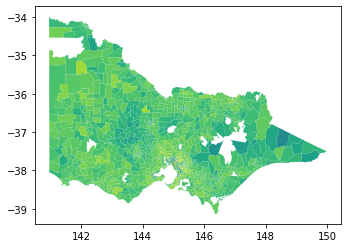

In [82]:
CD_2006.plot('ier_score')

In [83]:
gdf_2001 = gpd.read_file('/Users/garberj/data/vbadata_SEIFA/ABS_-_Socio-Economic_Indexes_for_Areas__SEIFA___CD__2001.json/data2516898914808603983.json')


In [84]:
gdf_1996 = gpd.read_file('/Users/garberj/data/vbadata_SEIFA/ABS_-_Socio-Economic_Indexes_for_Areas__SEIFA___CD__1996.json/data7336844287967253519.json')
gdf_1996.head()

,id,_urban_index_of_relative_socio_economic_advantage,index_of_relative_socio_economic_disadvantage,_state_code,_ssd_code,index_of_education_and_occupation_,rural_index_of_relative_socio_economic_advantage,_lga_code,_sla_code,cd_code,_index_of_economic_resources,_seifa96_population,poa,_sd_code,geometry
0,seifa_cd_1996.2112910,952.999,956.027,2,5,903.486,NaN,2750,2752,2112910,1000.653,1022,3215,10,"MULTIPOLYGON (((144.33249 -38.10581, 144.33281..."
1,seifa_cd_1996.2300608,964.898,958.893,2,10,980.110,NaN,4330,4330,2300608,992.463,388,3013,5,"MULTIPOLYGON (((144.87942 -37.81745, 144.87940..."
2,seifa_cd_1996.2021011,NaN,1059.383,2,10,971.212,990.279,1370,1374,2021011,1025.080,393,3620,40,"MULTIPOLYGON (((145.00004 -36.35528, 145.00017..."
3,seifa_cd_1996.2021208,984.394,1078.224,2,5,1027.477,NaN,2830,2831,2021208,1061.324,585,3629,40,"MULTIPOLYGON (((145.34579 -36.37607, 145.34585..."
4,seifa_cd_1996.2021801,1004.750,1013.994,2,5,1043.942,NaN,2830,2831,2021801,957.956,483,3630,40,"MULTIPOLYGON (((145.41266 -36.37713, 145.41415..."


In [85]:
gdf_1991 = gpd.read_file('/Users/garberj/data/vbadata_SEIFA/ABS_-_Socio-Economic_Indexes_for_Areas__SEIFA___CD__1991.json/data354505989715425060.json')


In [86]:
gdf_1991.columns

Index(['id', '_urban_index_of_relative_socio_economic_advantage',
       'index_of_relative_socio_economic_disadvantage', 'ssd', 'post',
       '_seifa91_population', 'state', 'sd',
       'index_of_education_and_occupation_',
       'rural_index_of_relative_socio_economic_advantage', 'state_name',
       'cd_code', '_index_of_economic_resources', 'cdsn', 'sla', 'lga',
       'cd_num', 'scd91', 'geometry'],
      dtype='object')

In [87]:
gdf_1986= gpd.read_file('/Users/garberj/data/vbadata_SEIFA/ABS_-_Socio-Economic_Indexes_for_Areas__SEIFA___CD__1986.json/data7355794508419511170.json')


In [88]:
gdf_1986.columns

Index(['id', '_index_of_economic_resources_', 'sla_name_', 'postal_areas_',
       'index_of_relative_socio_economic_disadvantage_', 'sla_',
       'index_of_education_and_occupation_', 'state_', 'state_name',
       '_seifa86_population_', 'cd_code', 'geometry'],
      dtype='object')

In [89]:
gdf_1996.columns

Index(['id', '_urban_index_of_relative_socio_economic_advantage',
       'index_of_relative_socio_economic_disadvantage', '_state_code',
       '_ssd_code', 'index_of_education_and_occupation_',
       'rural_index_of_relative_socio_economic_advantage', '_lga_code',
       '_sla_code', 'cd_code', '_index_of_economic_resources',
       '_seifa96_population', 'poa', '_sd_code', 'geometry'],
      dtype='object')

In [90]:
gdf_2001 = gdf_2001[gdf_2001['state_name'] == "Victoria"]

In [91]:
gdf_2001.columns

Index(['id', 'q90_ieo', 'q50_ieo', 'total_irsd', 'q50_ier', 'q90_ier',
       'suburb_code', 'commonwealth_electoral_div_name',
       'state_electoral_div_name', 'seifa_2001_population',
       'statistical_local_area_name', 'state_name', 'statistical_subdivision',
       'total_irsad', 'q25_irsd', 'irsd_score', 'local_government_area_name',
       'ier_score', 'q50_irsd', 'ieo_score', 'statistical_subdivision_name',
       'q90_irsad', 'state_code', 'total_ier', 'q25_irsad', 'total_ieo',
       'postal_area_2', 'statistical_division', 'q75_irsad', 'q10_irsd',
       'commonwealth_electoral_div', 'q50_irsad', 'suburb_name', 'postal_area',
       'q10_irsad', 'q75_ieo', 'q75_irsd', 'statistical_division_name',
       'q75_ier', 'statistical_local_area', 'q25_ier', 'state_electoral_div',
       'isad_score', 'cd_code_2001', 'q25_ieo', 'q90_irsd', 'q10_ier',
       'local_government_area', 'q10_ieo', 'geometry'],
      dtype='object')

In [92]:
gdf_2001.statistical_subdivision

4        22015
5        20510
6        20510
7        22010
16       20510
         ...  
10245    20550
10246    20550
10247    20575
10248    20575
10249    20550
Name: statistical_subdivision, Length: 8479, dtype: object

In [93]:
def convert_cds_colnames(df):
    name_change = {}
    drop_cols = []
    keep_cols = ['geometry', 'ier_score', 'ieo_score']
    for col in list(df.columns):
        print(col) 
        if 'index_of_economic_resources' in col:
            name_change[col] = 'ier_score'
#         elif "state_code"
   
        elif 'index_of_education_and_occupation' in col:
            name_change[col] = 'ieo_score'
     
        elif '_population' in col:
            name_change[col] = 'population'
        elif col not in keep_cols:
            drop_cols.append(col)
    print(drop_cols)
    print(name_change)
    return df.rename(columns = name_change).drop(columns=drop_cols)
        

In [94]:
CD_2006.head()

,STATE_CODE,CD_CODE06,SLA_CODE06,SLA_NAME06,LGA_CODE06,LGA_NAME06,geometry,cd_code,ier_score,ieo_score,population
0,2,2291001,205054601,Melbourne (C) - Inner,24600,Melbourne (C),"POLYGON ((144.95392 -37.81247, 144.95416 -37.8...",2291001.0,873.44,1153.52,519.0
1,2,2291002,205054601,Melbourne (C) - Inner,24600,Melbourne (C),"POLYGON ((144.96226 -37.81228, 144.96331 -37.8...",2291002.0,820.63,1188.58,433.0
2,2,2291003,205054601,Melbourne (C) - Inner,24600,Melbourne (C),"POLYGON ((144.96874 -37.80816, 144.96920 -37.8...",2291003.0,856.66,1227.99,414.0
3,2,2291004,205054601,Melbourne (C) - Inner,24600,Melbourne (C),"POLYGON ((144.96563 -37.81353, 144.96575 -37.8...",2291004.0,891.65,1130.06,95.0
4,2,2291005,205054601,Melbourne (C) - Inner,24600,Melbourne (C),"POLYGON ((144.97305 -37.81136, 144.97350 -37.8...",2291005.0,1011.53,1224.25,286.0


Exception ignored in: <function BaseGeometry.__del__ at 0x7fe6901b0790>
Traceback (most recent call last):
  File "/Users/garberj/opt/anaconda3/envs/vbadata/lib/python3.8/site-packages/shapely/geometry/base.py", line 242, in __del__
    self.empty(val=None)
  File "/Users/garberj/opt/anaconda3/envs/vbadata/lib/python3.8/site-packages/shapely/geometry/base.py", line 224, in empty
    def empty(self, val=EMPTY):
KeyboardInterrupt: 


<AxesSubplot:>

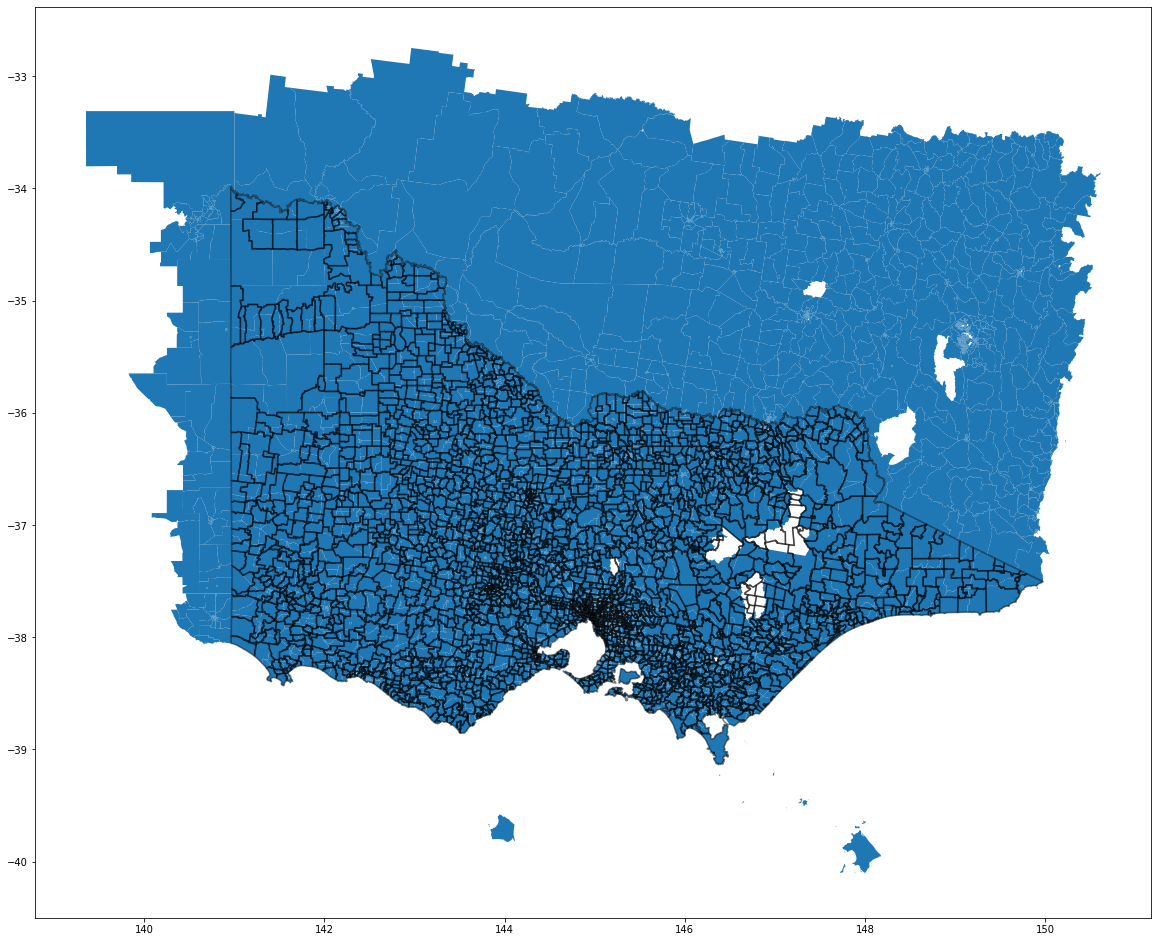

In [107]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))

rename_1996.to_crs("EPSG:4326").plot(ax=ax)
suburbs_coordinates.boundary.plot(ax=ax, alpha=0.5, color='black')

In [106]:
def calc_area(gdf, crs ='EPSG:32756'):
    return gdf.geometry.to_crs(crs).area

In [109]:
def w_avg(df, values, weights):
    
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()

In [101]:
out.reset_index().head()

NameError: name 'out' is not defined

In [103]:
suburbs_raw.head()

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,fixed_name,geometry
0,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,UNDERBOOL,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0..."
1,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,NURRAN,"POLYGON ((148.66877 -37.39571, 148.66767 -37.3..."
2,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.3,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,WOORNDOO,"POLYGON ((142.92288 -37.97886, 142.85448 -37.9..."
3,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.4,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,DEPTFORD,"POLYGON ((147.82336 -37.66001, 147.72499 -37.6..."
4,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.5,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,YANAC,"POLYGON ((141.27978 -35.99859, 141.28480 -35.9..."


In [104]:
suburbs_coordinates = suburbs_raw[['geometry', 'fixed_name']].rename(columns={'fixed_name':'Site_suburb'})

In [110]:
concat_stack = []
for year,df in zip([1986, 1991, 1996, 2001, 2006],[gdf_1986, gdf_1991, gdf_1996, gdf_2001, CD_2006]):
    df_rename = convert_cds_colnames(df)
    df_union = gpd.overlay(df_rename.to_crs("EPSG:4326"), suburbs_coordinates)
    df_union['area'] = calc_area(df_union)
    agg_ieo = df_union.groupby('Site_suburb').apply(w_avg, 'ieo_score', 'area')
    agg_ier = df_union.groupby('Site_suburb').apply(w_avg, 'ier_score', 'area')

    out = pd.DataFrame({'ieo_score':agg_ieo, 'ier_score':agg_ier}).reset_index()
    out['year'] = year
    concat_stack.append(out)
    


id
_index_of_economic_resources_
sla_name_
postal_areas_
index_of_relative_socio_economic_disadvantage_
sla_
index_of_education_and_occupation_
state_
state_name
_seifa86_population_
cd_code
geometry
['id', 'sla_name_', 'postal_areas_', 'index_of_relative_socio_economic_disadvantage_', 'sla_', 'state_', 'state_name', 'cd_code']
{'_index_of_economic_resources_': 'ier_score', 'index_of_education_and_occupation_': 'ieo_score', '_seifa86_population_': 'population'}
id
_urban_index_of_relative_socio_economic_advantage
index_of_relative_socio_economic_disadvantage
ssd
post
_seifa91_population
state
sd
index_of_education_and_occupation_
rural_index_of_relative_socio_economic_advantage
state_name
cd_code
_index_of_economic_resources
cdsn
sla
lga
cd_num
scd91
geometry
['id', '_urban_index_of_relative_socio_economic_advantage', 'index_of_relative_socio_economic_disadvantage', 'ssd', 'post', 'state', 'sd', 'rural_index_of_relative_socio_economic_advantage', 'state_name', 'cd_code', 'cdsn', 'sla',

In [111]:
combined = pd.concat(concat_stack)

In [135]:
suburbs_raw

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,fixed_name,geometry
0,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,UNDERBOOL,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0..."
1,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,NURRAN,"POLYGON ((148.66877 -37.39571, 148.66767 -37.3..."
2,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.3,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,WOORNDOO,"POLYGON ((142.92288 -37.97886, 142.85448 -37.9..."
3,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.4,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,DEPTFORD,"POLYGON ((147.82336 -37.66001, 147.72499 -37.6..."
4,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.5,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,YANAC,"POLYGON ((141.27978 -35.99859, 141.28480 -35.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2969,10667,2017-06-02,None,VIC1635,2017-08-09,None,MELBOURNE AIRPORT,None,None,G,None,2,MELBOURNE AIRPORT,"POLYGON ((144.86758 -37.67103, 144.86630 -37.6..."
2969,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2970,10666,2017-06-02,None,VIC381,2017-08-09,None,BULLA,None,None,G,None,2,BULLA,"POLYGON ((144.80472 -37.66949, 144.80353 -37.6..."
2970,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2971,10688,2017-06-02,None,VIC2308,2017-08-09,None,SOMERS,None,None,G,None,2,SOMERS,"POLYGON ((145.19240 -38.40087, 145.18947 -38.4..."
2971,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2972,10687,2017-06-02,None,VIC1187,2017-08-09,None,HMAS CERBERUS,None,None,G,None,2,HMAS CERBERUS,"POLYGON ((145.19240 -38.40087, 145.19624 -38.3..."


In [133]:
suburbs_raw.to_file('/Users/garberj/repositories/vbadata/vbadata/data/geojson/suburbs_multiname.geojson', driver='GeoJSON')


In [115]:
combined[combined['Site_suburb'] == 'ASCOT - BALLARAT']

,Site_suburb,ieo_score,ier_score,year
73,ASCOT - BALLARAT,976.143536,1090.863628,1986
73,ASCOT - BALLARAT,999.826403,976.521000,1991
73,ASCOT - BALLARAT,995.661046,1045.726872,1996
73,ASCOT - BALLARAT,962.187293,1009.758210,2001
73,ASCOT - BALLARAT,1007.959878,1103.418934,2006


<AxesSubplot:xlabel='year'>

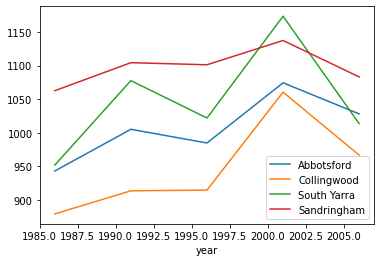

In [116]:
fig, ax = plt.subplots()
combined[combined['Site_suburb']=='ABBOTSFORD'].plot(x='year', y = 'ier_score', ax=ax, label='Abbotsford')
combined[combined['Site_suburb']=='COLLINGWOOD'].plot(x='year', y = 'ier_score', ax=ax, label='Collingwood')
combined[combined['Site_suburb']=='SOUTH YARRA'].plot(x='year', y = 'ier_score', ax=ax, label = 'South Yarra')
combined[combined['Site_suburb']=='SANDRINGHAM'].plot(x='year', y = 'ier_score', ax=ax, label='Sandringham')

In [117]:
combined[combined['Site_suburb']=='GOLDEN POINT']

,Site_suburb,ieo_score,ier_score,year


In [118]:
total_df = pd.concat([combined, df_comb])

In [119]:
import plotly.express as px

# px.line(data_frame=total_df.dropna(subset=['Site_suburb']), x='year', y='ier_score', color='Site_suburb')

In [120]:
# checking the coverage

total_df['ier_nan'] = total_df['ier_score'].isna()

In [121]:
(total_df.groupby('Site_suburb')['ier_nan'].sum()>0).sum()

0

In [122]:
total_df[total_df['Site_suburb']=='NEWTOWN']



,Site_suburb,ieo_score,ier_score,year,suburb_code,suburb_name,population,SSC_CODE_2011,suburb_name_fix,ier_nan


In [123]:
total_df['Site_suburb'].value_counts().head(20)

KIALLA EAST          7
MYERS FLAT           7
MAIDEN GULLY         7
MAGPIE               7
MAFFRA               7
MADDINGLEY           7
MACLEOD              7
MACEDON              7
MACCLESFIELD         7
MACARTHUR            7
LYSTERFIELD SOUTH    7
LYSTERFIELD          7
LYONVILLE            7
LYNDHURST            7
LYNBROOK             7
LURG                 7
LUCKNOW              7
WILLOWMAVIN          7
LOWER PLENTY         7
LOVELY BANKS         7
Name: Site_suburb, dtype: int64

<AxesSubplot:>

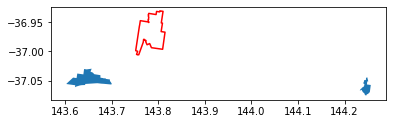

In [229]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
suburbs_coordinates[suburbs_coordinates.Site_suburb.apply(lambda x: 'MOONLIGHT FLA' in x)] .plot(ax=ax)
suburbs_coordinates[suburbs_coordinates.Site_suburb.apply(lambda x: 'HAVELO' in x)].boundary .plot(ax = ax, color = 'red')

In [191]:
ssc_2006.head()

,SSC Code,SSC Name
0,21003,Abbotsford
1,21005,Aberfeldie
2,21007,Airport West
3,21009,Albanvale
4,21011,Albert Park


In [192]:
ssc_2011.head()

,SA1_MAINCODE_2011,SSC_CODE_2011,SSC_NAME_2011,CONF_VALUE,AREA_ALBERS_SQKM
8,21701142216,29191,Unclassified (Vic.),NaN,0.000000
17928,20607113904,20001,Abbotsford (Vic.),Very good,0.369466
17939,20603111414,20002,Aberfeldie,Very good,0.182652
17948,20401105407,20003,Acheron,Poor,146.475362
17949,20303104903,20004,Aireys Inlet,Very good,1.610051


In [199]:
suburbs_raw = gpd.read_file('/Users/garberj/repositories/vbadata/vbadata/data/geojson/suburb-10-vic.geojson')

In [204]:
suburbs_raw.head()

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry
0,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0..."
1,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66767 -37.3..."
2,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.3,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92288 -37.97886, 142.85448 -37.9..."
3,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.4,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82336 -37.66001, 147.72499 -37.6..."
4,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.5,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.27978 -35.99859, 141.28480 -35.9..."


<AxesSubplot:>

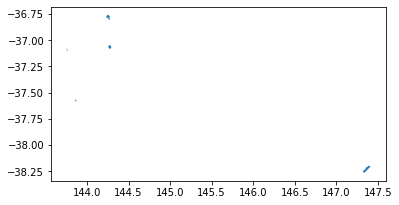

In [213]:
suburbs_raw[suburbs_raw.vic_loca_2.apply(lambda x: 'GOLDEN' in x)].plot()

In [206]:
from vbadata.data import PublicDataset
dataset = PublicDataset()
df_private = dataset.df_from_parquet()

In [215]:
df_private[df_private['Site_suburb'].apply(lambda x: 'Golden Point' in x)]

,permit_date,BASIS_Month_Y,BASIS_Month_M,Original_Levy_Paid__c,Reported_Cost_of_works,Site_street,Site_suburb,site_pcode,Site_Municipality,Municipal Full Name,...,BACV_applicable_flag,Calculated_levy_BACV,BASIS_OwnershipSector,BASIS_OwnerBuilder,site_municipality,site_municipality_name,region,sub_region,sub_region1,BASIS_Zone
4868,2020-02-20,2020,2,16.61,12976,Dunn Street,Golden Point,3350,Ballarat,"Ballarat, City of",...,NaN,NaN,None,NaN,NaN,None,None,None,None,None
7744,2020-01-09,2020,1,21.76,17000,Humffray Street,Golden Point,3350,Ballarat,"Ballarat, City of",...,NaN,NaN,None,NaN,NaN,None,None,None,None,None
46592,2020-06-16,2020,6,16.38,12800,Main Road,Golden Point,3350,Ballarat,"Ballarat, City of",...,NaN,NaN,None,NaN,NaN,None,None,None,None,None
54046,2020-06-23,2020,6,1395.40,1090163,Main Road,Golden Point,3451,Ballarat,"Ballarat, City of",...,NaN,NaN,None,NaN,NaN,None,None,None,None,None
65615,2020-08-27,2020,8,0.00,9200,Bond Street,Golden Point,3350,Ballarat,"Ballarat, City of",...,NaN,NaN,None,NaN,NaN,None,None,None,None,None
95542,2020-11-20,2020,11,21.50,16799,BARKLY STREET,Golden Point,3451,Mount Alexander,"Mount Alexander, Shire of",...,NaN,NaN,None,NaN,NaN,None,None,None,None,None
53101,2019-07-19,2019,7,NaN,12010,Tress Street,Golden Point,3350.0,None,"Ballarat, City of",...,NaN,NaN,P,0.0,3.0,Ballarat,Rural,North West,NULL,None
81639,2019-10-28,2019,10,NaN,39450,Barkly Street,Golden Point,3350.0,None,"Ballarat, City of",...,NaN,NaN,P,0.0,3.0,Ballarat,Rural,North West,NULL,None
90475,2019-11-19,2019,11,NaN,36000,Humffray Street South,Golden Point,3550.0,None,"Ballarat, City of",...,NaN,NaN,P,0.0,3.0,Ballarat,Rural,North West,NULL,None
94186,NaT,2019,11,NaN,267421,Steinfeld Street South,Golden Point,3350.0,None,"Ballarat, City of",...,NaN,NaN,P,0.0,3.0,Ballarat,Rural,North West,NULL,None


In [151]:
df_2006[df_2006['2006 State Suburb code (SSC)'] == 20002]

,2006 State Suburb code (SSC),Index of Relative Socio-economic Advantage and Disadvantage - Score,Index of Relative Socio-economic Advantage and Disadvantage - Decile,Index of Relative Socio-economic Disadvantage - Score,Index of Relative Socio-economic Disadvantage - Decile,Index of Economic Resources - Score,Index of Economic Resources - Decile,Index of Education and Occupation - Score,Index of Education and Occupation - Decile,Usual Resident Population


In [152]:
df_2006[df_2006['2006 State Suburb code (SSC)'] > 20000]

,2006 State Suburb code (SSC),Index of Relative Socio-economic Advantage and Disadvantage - Score,Index of Relative Socio-economic Advantage and Disadvantage - Decile,Index of Relative Socio-economic Disadvantage - Score,Index of Relative Socio-economic Disadvantage - Decile,Index of Economic Resources - Score,Index of Economic Resources - Decile,Index of Education and Occupation - Score,Index of Education and Occupation - Decile,Usual Resident Population
2571,21003,1090.83,9,1039.51,7,1014.26,5,1144.46,10,4327
2572,21005,1088.34,9,1088.13,9,1057.96,8,1083.29,9,3450
2573,21007,977.16,6,992.74,5,995.60,5,957.96,4,6658
2574,21009,902.44,2,901.21,1,957.12,3,885.00,1,5574
2575,21011,1131.02,10,1071.38,9,1063.98,8,1164.00,10,5827
...,...,...,...,...,...,...,...,...,...,...
8262,81491,1078.78,9,1062.03,8,1027.45,6,1117.23,10,2535
8263,81496,1093.69,10,1063.46,8,1020.93,6,1155.35,10,4187
8264,81501,1175.81,10,1144.80,10,1158.16,10,1173.32,10,2545
8265,81506,1103.80,10,1069.91,9,1059.33,8,1126.53,10,3176


In [125]:
# total_df['ier_score'] = pd.to_numeric(total_df['ier_score'], errors='coerce')
import numpy as np
total_df['ier_year_missed'] = (total_df['ier_score'].isna().astype('int'))*total_df['year']
total_df['ier_year_missed'][total_df['ier_year_missed']==0] = np.nan

<ipython-input-125-9803e66c49ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['ier_year_missed'][total_df['ier_year_missed']==0] = np.nan


In [126]:
# import sys
# !conda install --yes --prefix {sys.prefix} numpy
# import seaborn as sns
px.bar(total_df[total_df['ier_year_missed']>0]['ier_year_missed'].value_counts())

KeyError: 'variable'

In [130]:
total_df[['Site_suburb', 'ieo_score', 'ier_score', 'year']].to_csv('/Users/garberj/repositories/vbadata/vbadata/data/seifa_timeseries_suburb.csv', index=True)

In [50]:
def plot_suburb_ts(df, suburbs, score = 'ier_score'):
    fig, ax = plt.subplots()
    for suburb in suburbs:
        df[df['Site_suburb']==suburb].plot(x='year', y = score, ax=ax, label=suburb)
    return fig

    

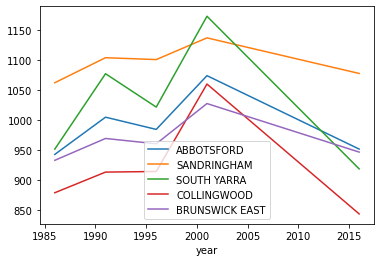

In [51]:
fig = plot_suburb_ts(total_df, ['ABBOTSFORD', 'SANDRINGHAM', 'SOUTH YARRA', 'COLLINGWOOD', 'BRUNSWICK EAST'])

In [174]:
total_df[total_df.Site_suburb=='ABBOTSFORD']

,Site_suburb,ieo_score,ier_score,year,suburb_code,suburb_name,population
1,ABBOTSFORD,979.509805,943.137223,1986,NaN,NaN,NaN
1,ABBOTSFORD,1070.228688,1005.15779,1991,NaN,NaN,NaN
1,ABBOTSFORD,1109.511044,984.785459,1996,NaN,NaN,NaN
1,ABBOTSFORD,1139.335079,1074.329043,2001,NaN,NaN,NaN


In [176]:
df_comb[df_comb.Site_suburb=='ABBOTSFORD']

,suburb_code,suburb_name,ier_score,ieo_score,population,year,Site_suburb


In [177]:
df_comb.head()

,suburb_code,suburb_name,ier_score,ieo_score,population,year,Site_suburb
4113,20002,Abbotsford (Vic.),952,1159,8184.0,2016,ABBOTSFORD
4114,20003,Aberfeldie,1079,1102,3897.0,2016,ABERFELDIE
4115,20005,Acheron,1035,1061,171.0,2016,ACHERON
4116,20007,Adams Estate,991,896,59.0,2016,ADAMS ESTATE
4117,20008,Addington,1031,1009,71.0,2016,ADDINGTON


<AxesSubplot:>

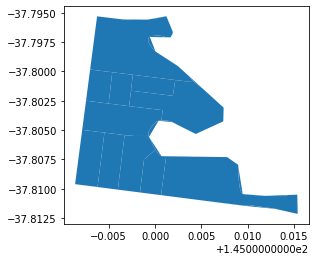

In [82]:
union_1996[union_1996['Site_suburb']=='ABBOTSFORD'].plot()

In [17]:
from vbadata.mapping import create_plotly_choropleth

In [18]:
?create_plotly_choropleth

<AxesSubplot:>

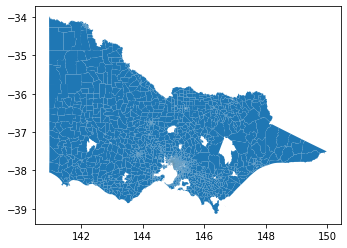

In [20]:
gdf_2001.plot()

In [21]:
gdf_2001_union = gpd.overlay(gdf_2001, suburbs_coordinates)

<ipython-input-21-bbe2ab43a9c6>:1: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4283
Right CRS: EPSG:4326




In [25]:
gdf_2001_union['area'] = gdf_2001_union.geometry.to_crs('EPSG:32756').area

KeyError: 'poa'

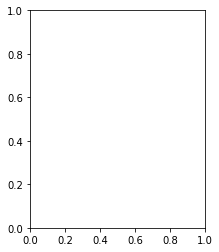

In [29]:
gdf_2001.plot('poa')

## Archive

In [263]:
for name in ssc_2006.sort_values('SSC Name')['SSC Name']:
    if '(' in name:
        print(name)

Ascot (Ballarat)
Ascot (Bendigo)
Bellfield (Grampians)
Bellfield (Greater Melbourne)
Big Hill (Bendigo)
Golden Point (Ballarat)
Hillside (East Gippsland)
Hillside (Melton)
Killara (Wodonga)
Merrijig (Mount Buller)
Newtown (Geelong)
Thomson (Geelong)


In [ ]:
union_1996['area'] = calc_area(union_1996)

In [97]:
agg_ieo = union_1996.groupby('Site_suburb').apply(w_avg, 'ieo_score', 'area')
agg_ier = union_1996.groupby('Site_suburb').apply(w_avg, 'ier_score', 'area')

out = pd.DataFrame({'ieo_score':agg_ieo, 'ier_score':agg_ier})

out.head()


NameError: name 'union_1996' is not defined

In [95]:
rename_1996 = convert_cds_colnames(gdf_1996)

id
_urban_index_of_relative_socio_economic_advantage
index_of_relative_socio_economic_disadvantage
_state_code
_ssd_code
index_of_education_and_occupation_
rural_index_of_relative_socio_economic_advantage
_lga_code
_sla_code
cd_code
_index_of_economic_resources
_seifa96_population
poa
_sd_code
geometry
['id', '_urban_index_of_relative_socio_economic_advantage', 'index_of_relative_socio_economic_disadvantage', '_state_code', '_ssd_code', 'rural_index_of_relative_socio_economic_advantage', '_lga_code', '_sla_code', 'cd_code', 'poa', '_sd_code']
{'index_of_education_and_occupation_': 'ieo_score', '_index_of_economic_resources': 'ier_score', '_seifa96_population': 'population'}


In [96]:
union_1996 = gpd.overlay(rename_1996.to_crs("EPSG:4326"), suburbs_coordinates)

NameError: name 'suburbs_coordinates' is not defined

In [ ]:
rename_1996.columns